<a href="https://colab.research.google.com/github/MykhailoMykhailiuk/DS-HW/blob/main/Hw2_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/My Drive/bestsellers with categories.csv"

df = pd.read_csv(file_path)
df.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [232]:
#Виведіть розміри датасету (використовуйте атрибут shape)
rows, cols = df.shape
print(f'Рядків - {rows}\nСтовпців - {cols}')

Рядків - 550
Стовпців - 7


In [233]:
#Відповідь: Про скільки книг зберігає дані датасет?
len(df)

550

In [234]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [235]:
#Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)
df.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

In [236]:
#Відповідь: Чи є в якихось змінних пропуски? (Так / ні)
'Ні'

'Ні'

In [237]:
#Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)
df['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

In [238]:
#Відповідь: Які є унікальні жанри? - 'Non Fiction', 'Fiction'

<Axes: >

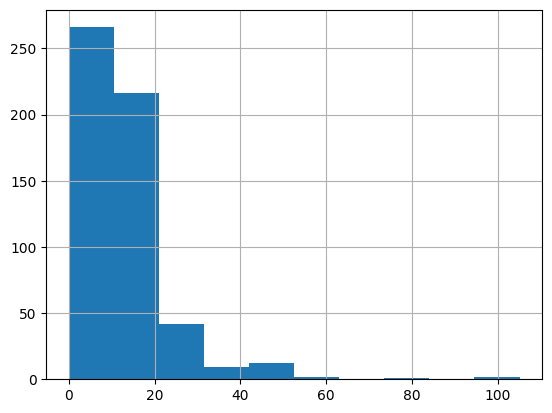

In [239]:
#Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')
df['price'].hist()

In [240]:
#Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)
# Відповідь: Максимальна ціна?
# Відповідь: Мінімальна ціна?
# Відповідь: Середня ціна?
# Відповідь: Медіанна ціна?
p_max = df['price'].max()
p_min = df['price'].min()
p_mean = df['price'].mean()
p_median = df['price'].median()
print(f'Максимальна ціна = {p_max}\nМінімальна ціна = {p_min}\nСередня ціна = {p_mean}\nМедіанна ціна = {p_median}')

Максимальна ціна = 105
Мінімальна ціна = 0
Середня ціна = 13.1
Медіанна ціна = 11.0


In [241]:
#Відповідь: Який рейтинг у датасеті найвищий? Відповідь:
print(f"Відповідь: {df['user_rating'].max()}")

Відповідь: 4.9


In [242]:
#Відповідь: Скільки книг мають такий рейтинг? Відповідь:
print(f"Відповідь: {len(df[df['user_rating'] == df['user_rating'].max()])}")

Відповідь: 52


In [243]:
#Відповідь: Яка книга має найбільше відгуків? Відповідь:
print(f"Відповідь: {df[df['reviews'] == df['reviews'].max()]['name'].values[0]}")

Відповідь: Where the Crawdads Sing


In [244]:
#Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь:
df_2015 = df[df['year']== 2015].sort_values(by='user_rating', ascending=False)[:50]
print(f"Відповідь: {df_2015[df_2015['price'] == df_2015['price'].max()]['name'].values[0]}")

Відповідь: Publication Manual of the American Psychological Association, 6th Edition


In [245]:
#Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь:
df_2010 = df[df['year'] == 2010].sort_values(by='user_rating', ascending=False)[:50]
print(f"Відповідь: {len(df_2010[df_2010['genre'] == 'Fiction'])}")

Відповідь: 20


In [246]:
#Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь:
df_10_11 = df[df['year'].isin([2010, 2011])].sort_values(by='user_rating', ascending=False)[:50]
print(f"Відповідь: {len(df_10_11[df_10_11['user_rating'] == 4.9])}")

Відповідь: 1


In [247]:
#І насамкінець, давайте відсортуємо за зростанням ціни всі книги,
#які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).
df_15 = df[df['year']== 2015].sort_values(by='price')
df_15[df_15['price'] < 8]

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
224,Love You Forever,Robert Munsch,4.8,18613,5,2015,Fiction
28,Baby Touch and Feel: Animals,DK,4.6,5360,5,2015,Non Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


In [248]:
#Відповідь: Яка книга остання у відсортованому списку? Відповідь:
print(f"Відповідь: {df_15[df_15['price'] < 8]['name'].values[-1]}")

Відповідь: Old School (Diary of a Wimpy Kid #10)


In [249]:
#Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів
#(використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min).
#Не беріть усі стовпці, виберіть тільки потрібні вам
df.groupby('genre').agg({'price':['min', 'max']})

price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105

In [250]:
# Відповідь: Максимальна ціна для жанру Fiction: 82
# Відповідь: Мінімальна ціна для жанру Fiction: 0
# Відповідь: Максимальна ціна для жанру Non Fiction: 105
# Відповідь: Мінімальна ціна для жанру Non Fiction: 0

In [251]:
#Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів
#(використовуйте функції groupby та agg, для підрахунку кількості використовуйте count).
#Не беріть усі стовпці, виберете тільки потрібні
df_author = df.groupby('author').agg({'name': 'count'}).reset_index()
df_author.columns = ['author', 'book_count']
df_author

,author,book_count
0,Abraham Verghese,2
1,Adam Gasiewski,1
2,Adam Mansbach,1
3,Adir Levy,1
4,Admiral William H. McRaven,1
...,...,...
243,Walter Isaacson,3
244,William Davis,2
245,William P. Young,2
246,Wizards RPG Team,3


In [252]:
# Відповідь: Якої розмірності вийшла таблиця? Відповідь:
# Відповідь: Який автор має найбільше книг? Відповідь:
# Відповідь: Скільки книг цього автора? Відповідь:
rows, cols = df_author.shape
author = df_author['author'][df_author['book_count'] == df_author['book_count'].max()].values[0]
book_count = df_author['book_count'].max()
print(f"Розмірність таблиці: {rows} - рядків, {cols} - стовпців\n\
Автор з найбільшою к-стю книг: {author}\n\
Кількість книг {author}: {book_count}")

Розмірність таблиці: 248 - рядків, 2 - стовпців
Автор з найбільшою к-стю книг: Jeff Kinney
Кількість книг Jeff Kinney: 12


In [253]:
#Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора
#(використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean).
#Не беріть усі стовпці, виберете тільки потрібні
author_rate = df.groupby('author').agg({'user_rating': 'mean'}).reset_index()
author_rate

,author,user_rating
0,Abraham Verghese,4.600000
1,Adam Gasiewski,4.400000
2,Adam Mansbach,4.800000
3,Adir Levy,4.800000
4,Admiral William H. McRaven,4.700000
...,...,...
243,Walter Isaacson,4.566667
244,William Davis,4.400000
245,William P. Young,4.600000
246,Wizards RPG Team,4.800000


In [254]:
# Відповідь: У якого автора середній рейтинг мінімальний? Відповідь:
# Відповідь: Який у цього автора середній рейтинг? Відповідь:
author = author_rate['author'][author_rate['user_rating'] == author_rate['user_rating'].min()].values[0]
rate = author_rate['user_rating'].min()
print(f"Автор з мінімальним середніс рейтингом: {author}\n\
Середній рейтинг {author}: {rate}")

Автор з мінімальним середніс рейтингом: Donna Tartt
Середній рейтинг Donna Tartt: 3.9


In [255]:
#З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг
#(Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну
#Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)
new_df = pd.concat([df_author.set_index('author'), author_rate.set_index('author')], axis=1).reset_index()
new_df = new_df.sort_values(by=['book_count', 'user_rating'], ascending=[True, True])
new_df

,author,book_count,user_rating
171,Muriel Barbery,1,4.000000
43,Chris Cleave,1,4.100000
109,Ian K. Smith M.D.,1,4.100000
186,Pierre Dukan,1,4.100000
81,Elizabeth Strout,1,4.200000
...,...,...,...
11,American Psychological Association,10,4.500000
226,Suzanne Collins,11,4.663636
92,Gary Chapman,11,4.736364
197,Rick Riordan,11,4.772727


In [256]:
#Відповідь: Який автор перший у списку?
print(f"Відповідь: {new_df['author'].values[0]}")

Відповідь: Muriel Barbery


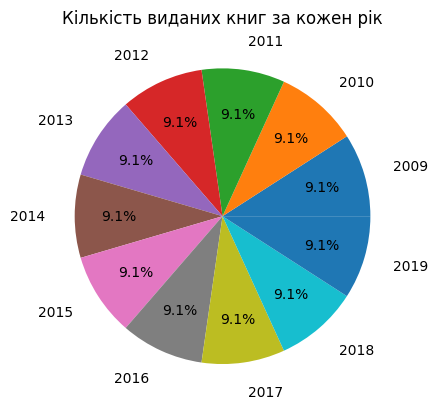

In [257]:
#Plot 1
year_count = df.groupby('year').agg({'name': 'count'}).reset_index()
year_count.columns = ['year', 'book_count']
year_count.sort_values(by='year')
year_count
plt.pie(
    year_count['book_count'],
    labels=year_count['year'],
    autopct="%.1f%%",
    pctdistance=0.7,
    labeldistance=1.2,
)
plt.title('Кількість виданих книг за кожен рік')
plt.show()

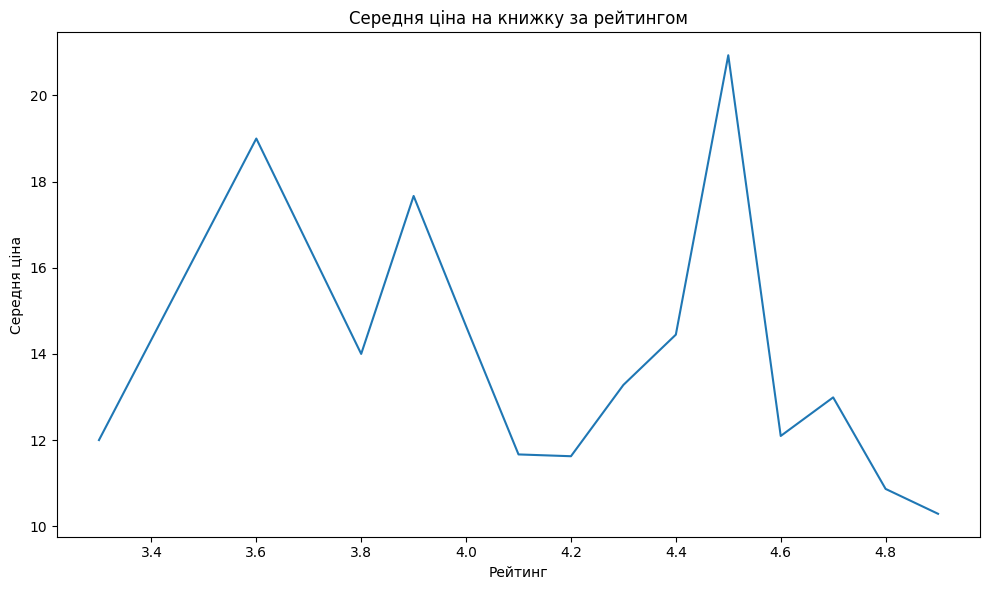

In [264]:
#Plot 2
rate_price = df.groupby('user_rating').agg({'price': 'mean'}).reset_index().sort_values(by='user_rating')
plt.figure(figsize=(10, 6))
plt.plot(rate_price['user_rating'], rate_price['price'])
plt.title('Середня ціна на книжку за рейтингом')
plt.xlabel('Рейтинг')
plt.ylabel('Середня ціна')
plt.tight_layout()
plt.show()

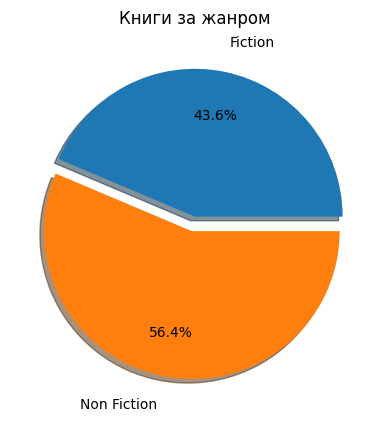

In [279]:
#Plot 3
genre = df.groupby('genre').agg({'name': 'count'}).reset_index()
genre.columns = ['genre', 'book_count']
explode = [0 , 0.1]
plt.pie(
    genre['book_count'],
    labels=genre['genre'],
    autopct="%.1f%%",
    explode=explode,
    shadow=True,
    pctdistance=0.7,
    labeldistance=1.2
)
plt.title('Книги за жанром')
plt.show()